In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_programs = []

for i in range(4):
    #Train data
    df = pd.read_excel('BSA-dataset_2122_2223-Train_stud_a.xlsx', sheet_name=i)
    df1 = df[df["Year"] == "21/22"]
    df2 =df[df["Year"] == "22/23"]

    df1_val = df1.sample(frac=0.3, random_state=25)
    df1_train = df1.drop(df1_val.index)

    df1_val["Origin"] = "test"
    df1_train["Origin"] = "train"

    df1_final = pd.concat([df1_val,df1_train])



    df2_val = df2.sample(frac=0.3, random_state=25)
    df2_train = df2.drop(df2_val.index)

    df2_val["Origin"] = "test"
    df2_train["Origin"] = "train"


    df2_final = pd.concat([df1_final,df2_train]) 


    df_final = pd.concat([df2_val,df2_final]) 
    df_programs.append(df_final)


In [46]:
df = pd.concat(df_programs,ignore_index=True)
columns_to_drop = [col for col in df.columns if col.startswith("Co")]
df = df.drop(columns=columns_to_drop)
df.columns

Index(['train', 'Gender', 'Nationality', 'PreEducation', 'Program', 'Year',
       'BSA', 'Credits-Y1', 'Crd-B1B2', 'Origin'],
      dtype='object')

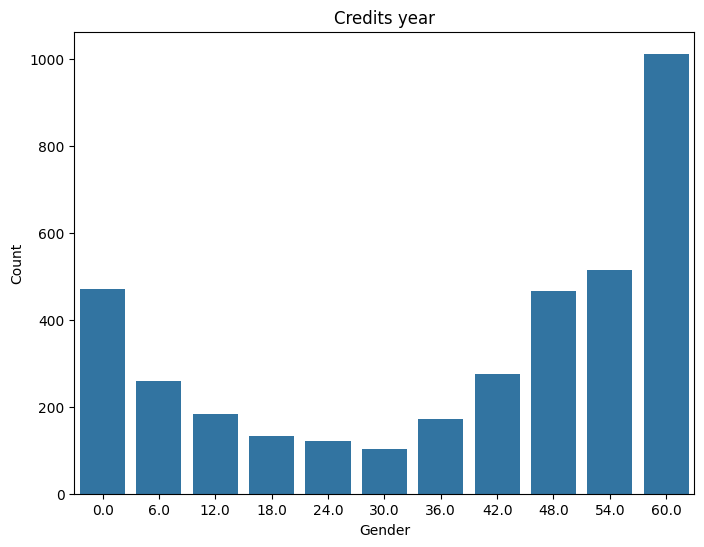

In [45]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Credits-Y1', data=df[df[""]])
plt.title('Credits year')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


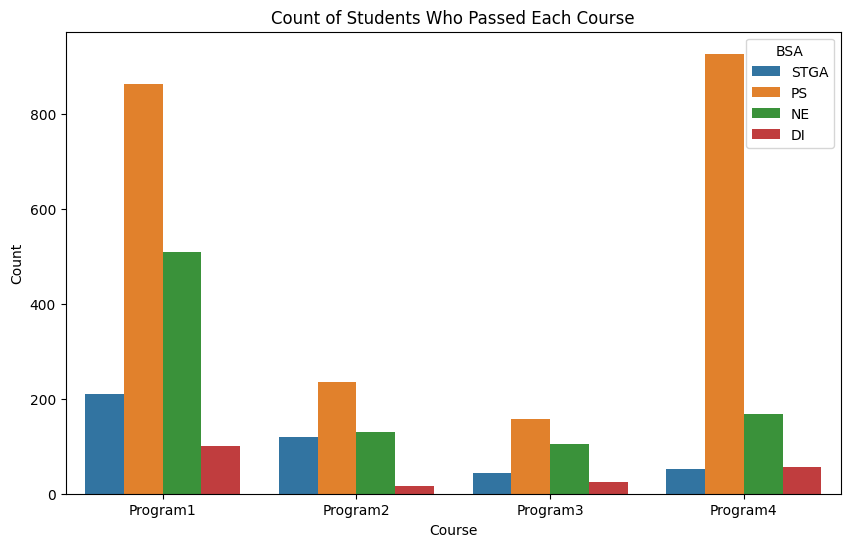

In [49]:
passed_counts = df[['BSA']].sum()

# Plotting the count of students who passed each course
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x ="Program", hue = "BSA")
plt.title('Count of Students Who Passed Each Course')
plt.xlabel('Course')
plt.ylabel('Count')
plt.show()


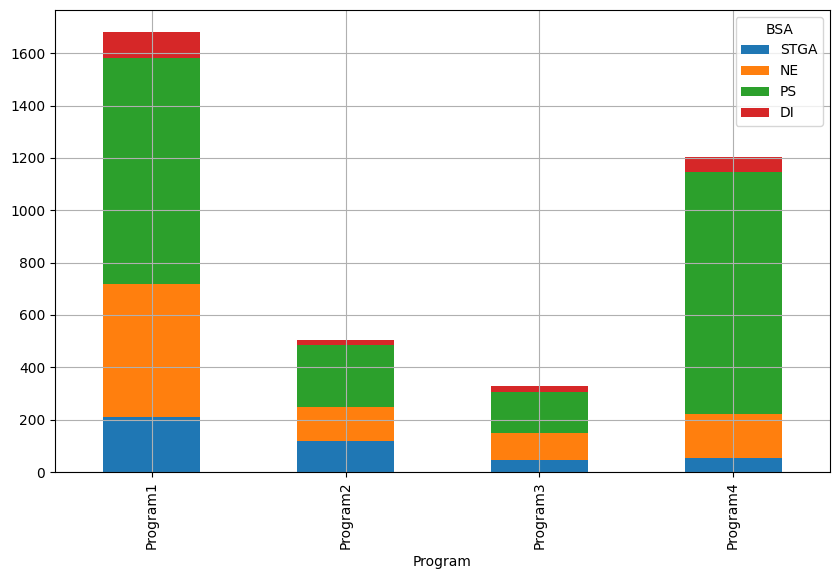

In [54]:
pivot_df = df.pivot_table(index="Program", columns="BSA", aggfunc="size", fill_value=0)

bsa_oder = ["STGA","NE","PS","DI"]
pivot_df = pivot_df.reindex(columns=bsa_oder)

pivot_df.plot(kind="bar", stacked=True,figsize=(10,6))

plt.grid(True)